In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


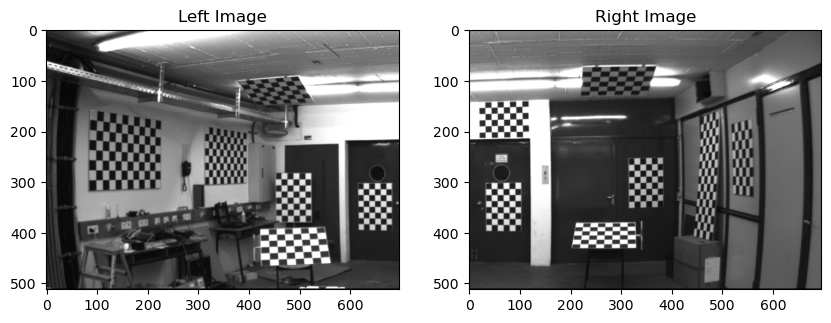

In [155]:

# Load the image (replace with the path to your uploaded image)
image_path = 'calibration.png'
img = cv2.imread(image_path)

# Convert to grayscale for corner detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# break the image in half
half = gray.shape[1] // 2
left = gray[:, :half]
right = gray[:, half:]

#display right and left images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(left, cmap='gray')
plt.title('Left Image')
plt.subplot(1, 2, 2)
plt.imshow(right, cmap='gray')
plt.title('Right Image')
plt.show()

gray= left.copy()


In [156]:
# List of chessboards with their respective number of internal corners (vertical, horizontal)
chessboards = [
    (15,5),
    (5,7),
    (7,5),
    (5,7),
    (7,5),
    (5,7),
    (7,5),
    (7,7),
    (4,4),
    (4,4),
    (4,4)
]


In [157]:
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in image plane

# Loop through each chessboard's configuration (different number of internal corners)
for nb_vertical, nb_horizontal in chessboards:
    print(f'Checking chessboard {nb_vertical}x{nb_horizontal}...')
    # Prepare object points for this specific chessboard (3D points in real-world space)
    objp = np.zeros((nb_horizontal * nb_vertical, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nb_vertical, 0:nb_horizontal].T.reshape(-1, 2)

    # Detect chessboard corners for this chessboard size
    ret, corners = cv2.findChessboardCorners(
            gray, (nb_vertical, nb_horizontal),
            flags=cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
        )
    print(ret)



    if ret: 
        objpoints.append(objp)  # 3D points
        imgpoints.append(corners)  # 2D points

        # Create a bounding box around the detected corners
        x_min, y_min = np.int32(corners.min(axis=0).ravel())
        x_max, y_max = np.int32(corners.max(axis=0).ravel())
        print(x_min, y_min, x_max, y_max)

        # Set all values inside the bounding box to 0
        gray[y_min:y_max, x_min:x_max] = 0



        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
        #for corners in imgpoints:
        #    if corners is not None:
        #        plt.plot(corners[:, 0, 0], corners[:, 0, 1], 'ro', markersize=5)
        plt.title('Detected Chessboard Corners')
        plt.show()

Checking chessboard 15x5...
False
Checking chessboard 5x7...
False
Checking chessboard 7x5...
False
Checking chessboard 5x7...
False
Checking chessboard 7x5...
False
Checking chessboard 5x7...
False
Checking chessboard 7x5...
False
Checking chessboard 7x7...
False
Checking chessboard 4x4...
False
Checking chessboard 4x4...
False
Checking chessboard 4x4...
False


In [151]:
imgpoints

[array([[[104.788246, 152.80406 ]],
 
        [[104.92076 , 164.84021 ]],
 
        [[105.24998 , 177.13972 ]],
 
        [[105.66163 , 189.53345 ]],
 
        [[105.93557 , 201.9888  ]],
 
        [[ 92.59971 , 153.07494 ]],
 
        [[ 92.68111 , 165.27437 ]],
 
        [[ 92.83498 , 177.59933 ]],
 
        [[ 93.123405, 189.99358 ]],
 
        [[ 93.49927 , 202.26373 ]],
 
        [[ 80.44609 , 153.52525 ]],
 
        [[ 80.564644, 165.68219 ]],
 
        [[ 80.69001 , 177.86906 ]],
 
        [[ 80.95017 , 190.15306 ]],
 
        [[ 81.022125, 202.38132 ]],
 
        [[ 68.224976, 153.9556  ]],
 
        [[ 68.38057 , 165.99582 ]],
 
        [[ 68.54146 , 178.14542 ]],
 
        [[ 68.63845 , 190.396   ]],
 
        [[ 68.80016 , 202.57242 ]],
 
        [[ 56.032284, 154.3563  ]],
 
        [[ 56.194878, 166.38155 ]],
 
        [[ 56.301003, 178.48317 ]],
 
        [[ 56.48025 , 190.65157 ]],
 
        [[ 56.59306 , 202.8031  ]],
 
        [[ 43.850147, 154.59052 ]],
 
        [[ 4

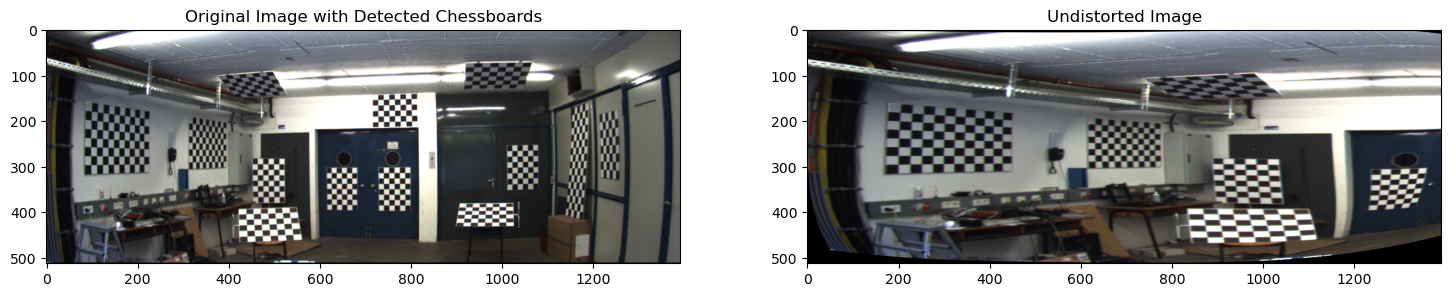

In [154]:
# Perform camera calibration using all the detected chessboards
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Get the optimal camera matrix
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# Undistort the original image
undistorted_img = cv2.undistort(img, mtx, dist, None, newcameramtx)

# Display the original and undistorted images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 18))
ax[0].imshow(img[..., [2, 1, 0]])  # Convert BGR to RGB for matplotlib
ax[0].set_title('Original Image with Detected Chessboards')
ax[1].imshow(undistorted_img[..., [2, 1, 0]])  # Convert BGR to RGB for matplotlib
ax[1].set_title('Undistorted Image')

plt.show()